Mean Absolute Percentage Error (MAPE): 0.10


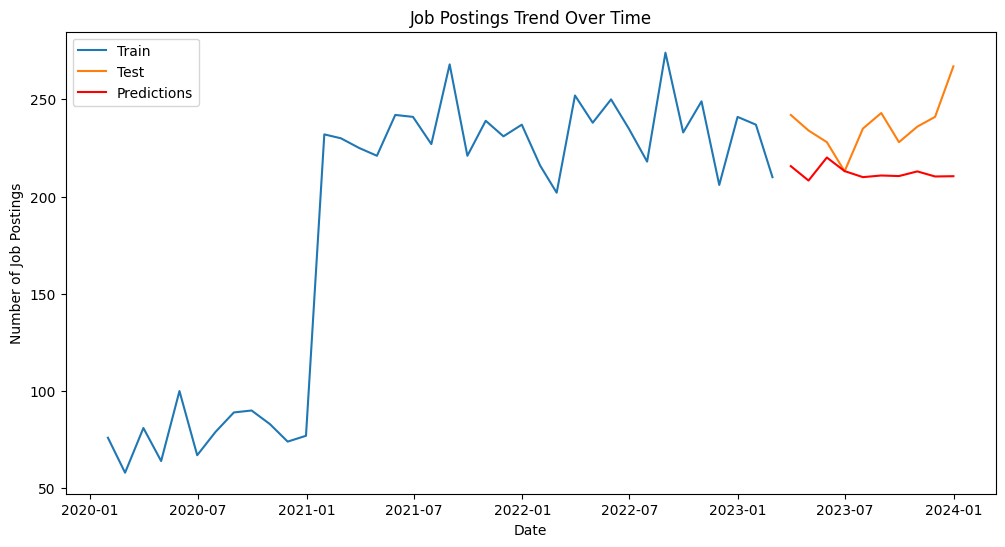

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import seaborn as sns
import joblib
import pickle

# Load and preprocess the trend prediction dataset
trend_data = pd.read_csv('postings2.csv')
trend_data['date_posted'] = pd.to_datetime(trend_data['date_posted'])
trend_data.set_index('date_posted', inplace=True)
monthly_job_postings = trend_data.resample('ME').size()

# Split the data into training and testing sets
train_size = int(len(monthly_job_postings) * 0.8)
train, test = monthly_job_postings[:train_size], monthly_job_postings[train_size:]

# Train the ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust the order (p, d, q) as needed
arima_model_fit = arima_model.fit()

# Save the ARIMA model
with open('arima_model.pkl', 'wb') as pkl_file:
    pickle.dump(arima_model_fit, pkl_file)

# Make predictions and validate the model
predictions = arima_model_fit.forecast(steps=len(test))
mape = mean_absolute_percentage_error(test, predictions)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('Job Postings Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.show()
